<a href="https://colab.research.google.com/github/VishalShah1999/Visulization_ML/blob/main/vs2530_HW5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 5
The main goal of this homework is to use what we have learned from white-box models to understand a black-box model's behavior.

We are still going to use the loan application dataset as in the practice 2. Find it here: https://drive.google.com/file/d/186LjbAZoMat91ByH7aJGJ8PnfO2LqKlu/view?usp=sharing

Don't forget to specify the filepath on your own Google Drive below.


You will need to finish the following subtasks:
- (1) Train a surrogate tree-based model to understand the model prediction behaviors of the provided SVM model. 
- (2) Answer a few questions based on the interpretation of the surrogate model.


In [1]:
import numpy as np
import pandas as pd
from sklearn import svm

In the column of "Outcome",
- 0 represents "will not default",
- 1 represents "will default".

In [2]:
df = pd.read_csv(filepath_or_buffer="cleaned_fico_data.csv",)
df

,Outcome,External Risk Estimate,Months Since Oldest Trade Open,Months Since Last Trade Open,Average Months in File,Satisfactory Trades,Trades 60+ Ever,Trades 90+ Ever,Bills Paid on Time,Months Since Last Delq.,...,% Installment Trades,Months Since Most Recent Inq,Inq Last 6 Months,Inq Last 6 Months exl. 7 days,Unpaid Balance,Installment Burden,Revolving Trades w/ Balance,Installment Trades w/ Balance,Bank Trades w/ High Utilization Ratio,% Trades w/ Balance
0,0,55,144,4,84,20,3,0,83,2,...,43,0,0,0,33,77,8,1,1,69
1,0,61,58,15,41,2,4,4,100,150,...,67,0,0,0,0,57,0,2,0,0
2,0,67,66,5,24,9,0,0,100,150,...,44,0,4,4,53,66,4,2,1,86
3,0,66,169,1,73,28,1,1,93,76,...,57,0,5,4,72,83,6,4,3,91
4,0,81,333,27,132,12,0,0,100,150,...,25,0,1,1,51,89,3,1,0,80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9866,1,73,131,5,57,21,0,0,95,80,...,19,7,0,0,26,81,5,2,0,100
9867,0,65,147,39,68,11,0,0,92,28,...,42,1,1,1,86,53,2,2,1,80
9868,0,74,129,6,64,18,1,1,100,150,...,33,3,4,4,6,53,5,3,0,56
9869,0,72,234,12,113,42,2,2,96,35,...,20,6,0,0,19,47,4,1,0,38


In [3]:
X = df.drop(columns=['Outcome']).values
y = df['Outcome'].values

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
'''train a decision tree model'''
clf = svm.SVC(kernel="linear", C=0.001, probability=True)
clf.fit(X_train, y_train)

SVC(C=0.001, kernel='linear', probability=True)

In [6]:
y_pred = clf.predict(X_test)

In [7]:
print("training accuracy:", clf.score(X_train, y_train))
print("testing accuracy:", clf.score(X_test, y_test))

training accuracy: 0.7310030395136778
testing accuracy: 0.7281012658227848


## Please train a surrogate model to approximate the original model's behavior on the **test set**?

How can we do that?

We can use the original model input (`X_test`), and the model output (but not the labels/ground truth) to train an interpretable surrogate model, for example, a decision tree, or a rule set.


Please include your surrogate model training code below. You can add or remove any code blocks.

In [9]:
from sklearn import tree

tree_model = tree.DecisionTreeClassifier(min_samples_split=40, max_depth=5)
tree_model = tree_model.fit(X_test, y_pred)

In [10]:
y_tree_pred = tree_model.predict(X_test)

In [11]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_tree_pred)

0.7265822784810126

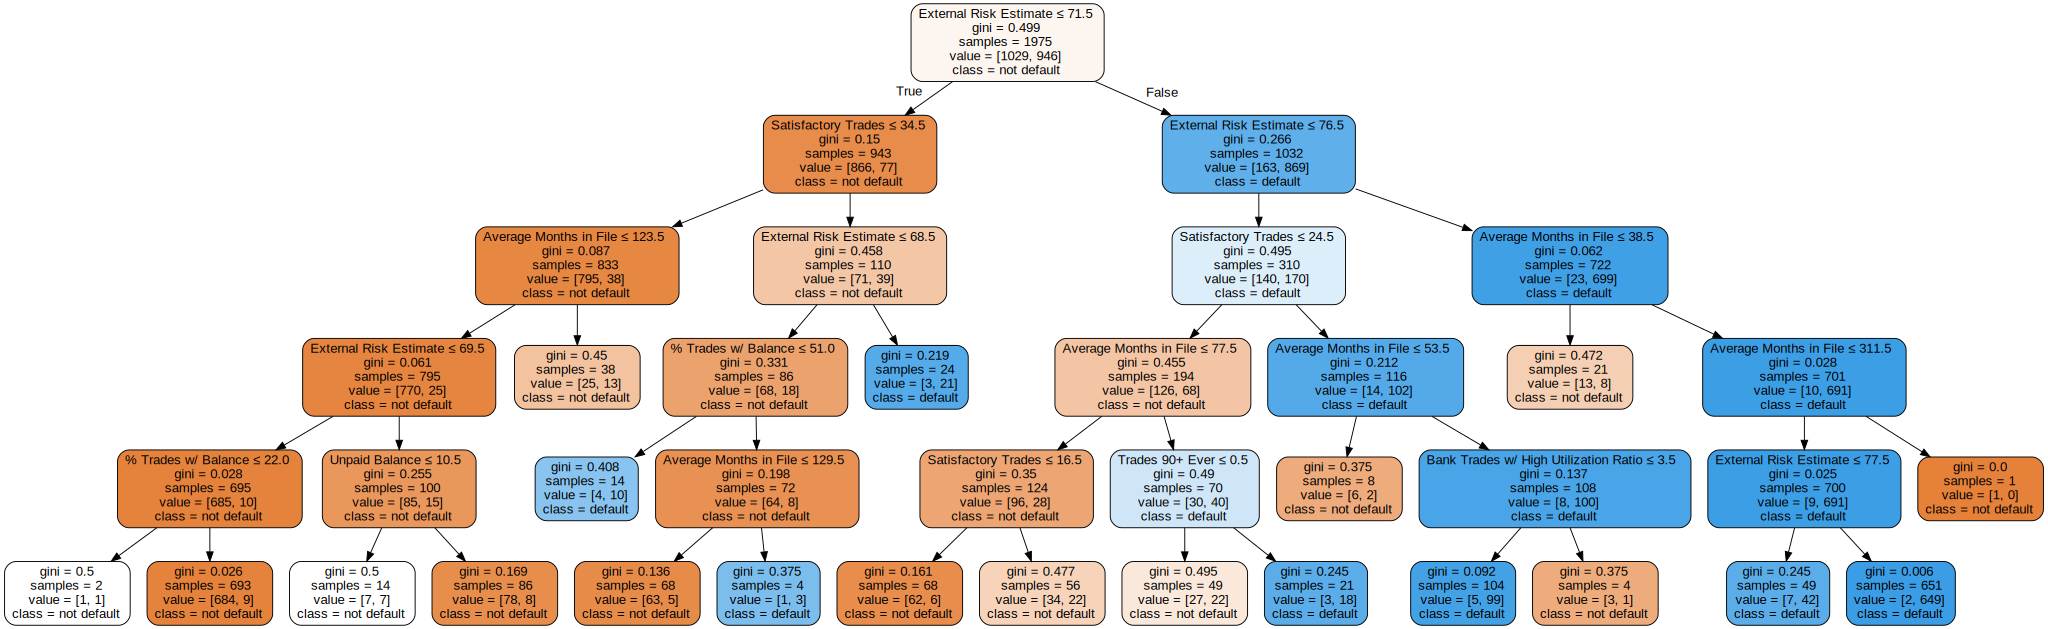

In [12]:
import graphviz

target_names = ['not default', 'default']
dot_data = tree.export_graphviz(tree_model, out_file=None, 
                                feature_names=df.columns[1:],
                                class_names=target_names,
                                filled=True, rounded=True, 
                                special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

## Question Answering
Please answer the following questions based on the surrogate model you have trained.  

(1) What features are important when the original model makes predictions? List the top 5 features that yout think are mostly important.
<br>
**Answer:** I have arranged all the features according to their importance. The top 5 attributes which are important is: 
Average Months in File, Months Since Last Trade Open, Bank Trades w/ High Utilization Ratio, Trades 60+ Ever, Inq Last 6 Months exl. 7 days
<br><br> 


(2) Please explain why you choose the parameters you used to train the surrogate tree.
<br>
**Answer:** The hyperparameter max_depth controls the overall complexity of a decision tree. This hyperparameter allows to get a trade-off between an under-fitted and over-fitted decision tree. Min Samples Spit allows growing asymmetric trees and apply a constraint at the leaves or nodes level.
<br><br>

(3) When a person is predicted as "will default" in the future, what may the loan application look like? Describe the application using no more than 3 features. And what's your reason for this description?
<br>
**Answer:** When a person is predicted as "will default" in the future the features that are most important is: Bills paid on Time, Months Since Most Recent Inq, Average Months in File
<br><br>

(4) Imagine that you are going to deploy this SVM model for the actual business department, please list 3 questions about this SVM model's behavior that you want to know before the actual deployment, and whether they can be answered by the surrogate tree. 
(Notice: This question is not to judege how well you can do something, just to help you understand the role of model interpretation in the whole pipeline. So you can just list whatever you want to talk about.)
<br>
**Answer:** 
<br>
1. First thing I would like to know is whether the data fits into the kernel provided by SVM or not. Surrogate model handles all types of data like, linear, poly, etc.

2. The size of the data. Because SVM can't handle huge amount of data while on the other side Surrogate Decision Tree handles it well.

3. Classification performance is almost identical in both cases but SVM took longer to trai the model then surrogate model.

<br><br>
======== You can run some code and answer the questions based on what you see from the result ========

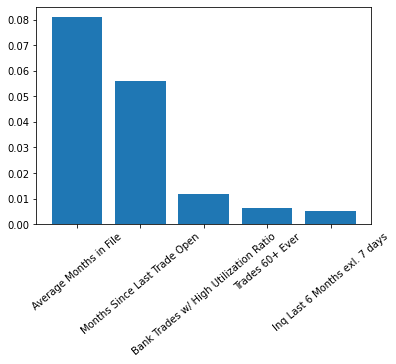

In [14]:
from matplotlib import pyplot
name1 = []
importance1 = []
# summarize feature importance
for importance, name in sorted(zip(tree_model.feature_importances_, df.columns),reverse=True)[1:6]:
    name1.append(name)
    importance1.append(importance)
# plot feature importance
pyplot.bar(name1, importance1)
pyplot.xticks(rotation = 40)
pyplot.show()

In [16]:
df.columns

Index(['Outcome', 'External Risk Estimate', 'Months Since Oldest Trade Open',
       'Months Since Last Trade Open', 'Average Months in File',
       'Satisfactory Trades', 'Trades 60+ Ever', 'Trades 90+ Ever',
       'Bills Paid on Time', 'Months Since Last Delq.', 'Max Delq. Last 12M',
       'Max Delq. Ever', 'Total Trades', 'Trades Open Last 12M',
       '% Installment Trades', 'Months Since Most Recent Inq',
       'Inq Last 6 Months', 'Inq Last 6 Months exl. 7 days', 'Unpaid Balance',
       'Installment Burden', 'Revolving Trades w/ Balance',
       'Installment Trades w/ Balance',
       'Bank Trades w/ High Utilization Ratio', '% Trades w/ Balance'],
      dtype='object')